# Relatório de análise VII

## Criando agrupamentos

In [23]:
import pandas as pd

In [24]:
dados = pd.read_csv('dados/aluguel_residencial.csv',sep=';')

In [25]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [26]:
dados['Valor'].mean()

5159.318636548821

In [27]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [28]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22081,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
22082,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
22083,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
22085,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


### Confirmando que só estão os bairros desejados

In [29]:
dados['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Tijuca', 'Ipanema', 'Botafogo',
       'Leblon', 'Flamengo'], dtype=object)

In [30]:
grupo_bairro = dados.groupby("Bairro")

In [31]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [32]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 65, 69, 75, 80, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 500, 506, 509, 517, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 592, 595, 596, 598, 602, 604, 609, 619, 631, 639, ...], 'Botafogo': [23, 48, 58, 88, 89, 112, 120, 128, 135, 138, 199, 203, 228, 327, 338, 366, 419, 420, 504, 530, 532, 551, 601, 659, 695, 729, 766, 776, 784, 835, 840, 874, 931, 940, 944, 1023, 1060, 1098, 1109, 1128, 1134, 1145, 1158, 1183, 1220, 1224, 1242, 1269, 1301, 1314, 1324, 1337, 1368, 1404, 1423, 1436, 1441, 1457, 1478, 1521, 1542, 1554, 1604, 1655, 1680, 1695, 1724, 1766, 1767, 1814, 1840, 1849, 1852, 1879, 1948, 1957, 1984, 1999, 2008, 2016, 2056, 2093, 2096, 2108, 2110, 2111, 2

In [33]:
for bairro, data in grupo_bairro:
    print(f'{bairro}, {data.Valor.mean()}')

Barra da Tijuca, 7089.933523021211
Botafogo, 9328.872881355932
Copacabana, 4137.687429218573
Flamengo, 4146.934265734266
Ipanema, 9525.7616638561
Leblon, 8791.985714285714
Tijuca, 2133.7865470852016


In [34]:
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7089.93,3588.23
Botafogo,9328.87,905.31
Copacabana,4137.69,1147.00
Flamengo,4146.93,1100.61
Ipanema,9525.76,2230.64
Leblon,8791.99,2104.63
Tijuca,2133.79,702.12


## Estatisticas Descritivas

In [36]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3866.0,7089.93,11914.52,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,944.0,9328.87,146382.98,700.0,2300.0,3200.0,4650.0,4500000.0
Copacabana,2649.0,4137.69,3627.79,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,715.0,4146.93,3939.06,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1779.0,9525.76,8706.01,1200.0,4500.0,7000.0,11500.0,100000.0
Leblon,1260.0,8791.99,7092.24,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1115.0,2133.79,1896.81,750.0,1500.0,1800.0,2300.0,45000.0


In [39]:
grupo_bairro['Valor'].aggregate(['min','max']).rename(columns = {'min':'Minimo','max': 'Maximo' })

,Minimo,Maximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,100000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro ')

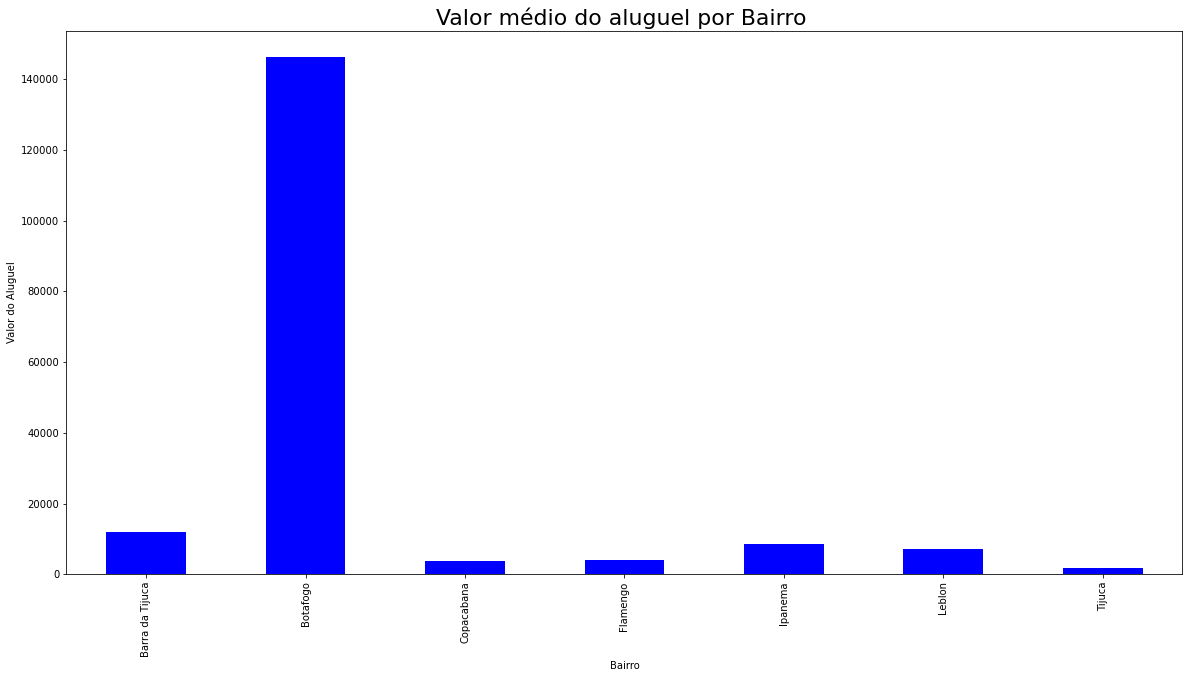

In [44]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por Bairro ',{'fontsize':22 })

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro ')

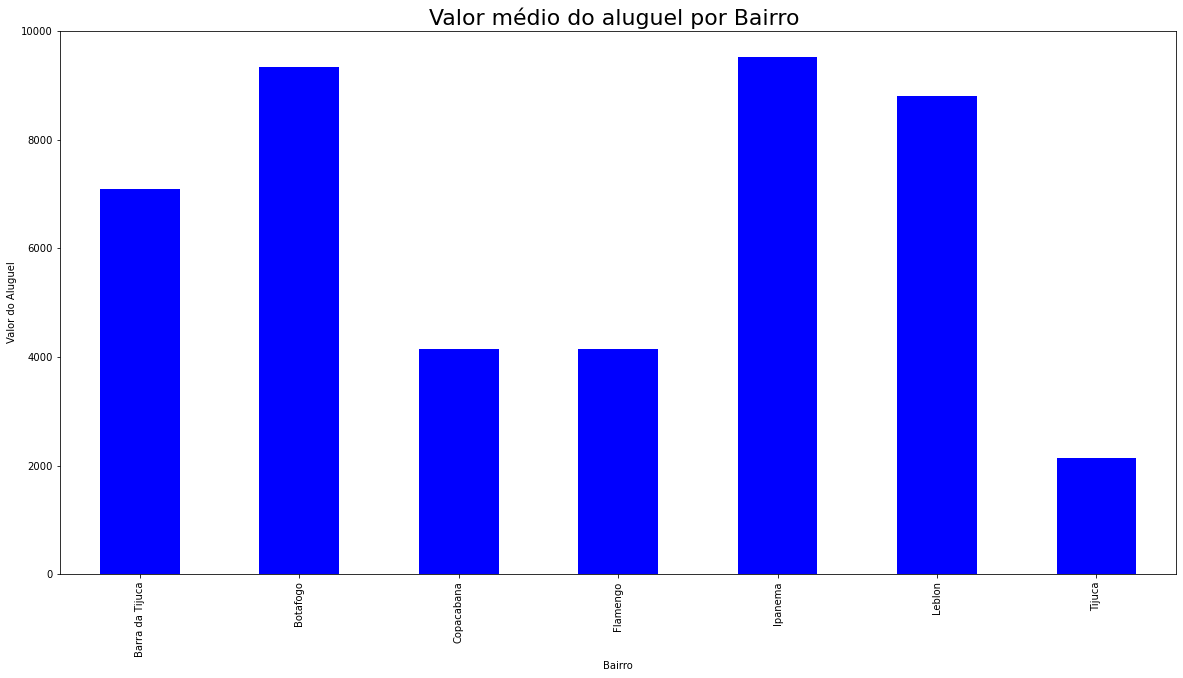

In [45]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por Bairro ',{'fontsize':22 })

Text(0.5, 1.0, 'Valor médio do aluguel por Bairro ')

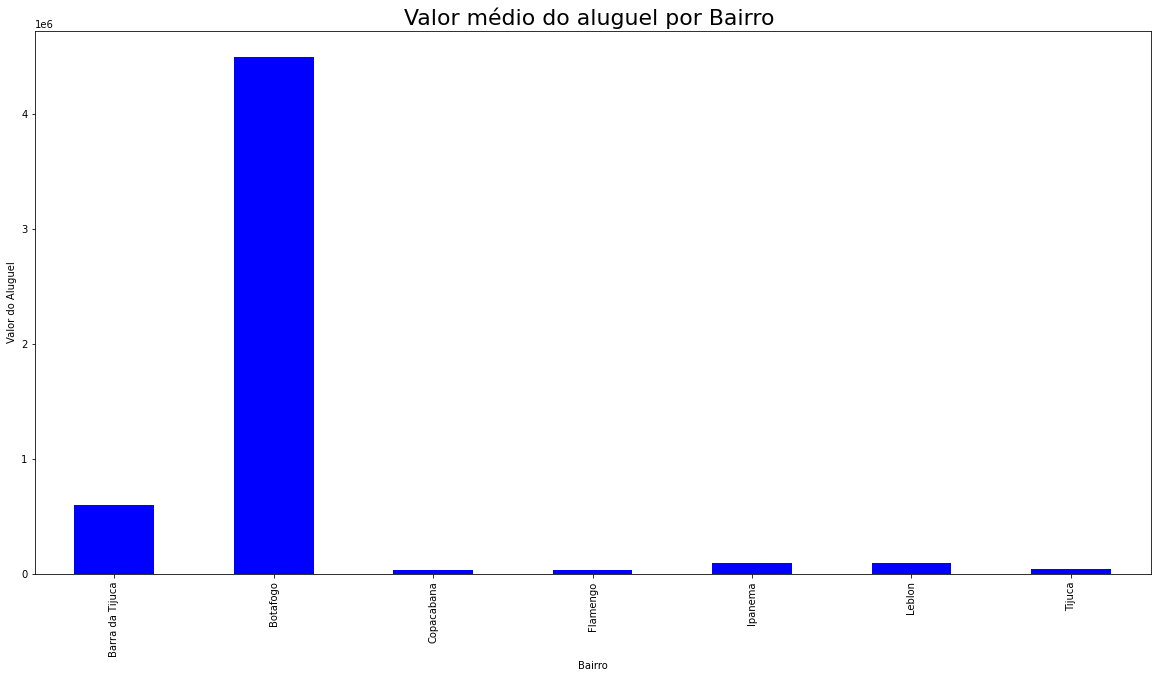

In [46]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por Bairro ',{'fontsize':22 })